In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon

def load_spike_data(file_path):
    return np.loadtxt(file_path)

def convert_to_time(spike_indices, sampling_rate=20000):
    dt = 1.0 / sampling_rate
    return spike_indices * dt

def compute_spike_counts(spike_times, window_size):
    T = spike_times[-1]
    num_windows = int(np.ceil(T / window_size))
    counts = np.zeros(num_windows)
    window_edges = np.linspace(0, T, num_windows + 1)
    for i in range(num_windows):
        counts[i] = np.sum((spike_times >= window_edges[i]) & (spike_times < window_edges[i+1]))
    return counts

def compute_isi(spike_times):
    return np.diff(spike_times)


In [19]:
all_file_paths = ['ec012\\ec012ec.187.res.1', 
                  'ec012\\ec012ec.187.res.2', 
                  'ec012\\ec012ec.228.res.1', 
                  'ec012\\ec012ec.228.res.2', 
                  'ec012\\ec012ec.375.res.1', 
                  'ec012\\ec012ec.375.res.2', 
                  'ec016\\ec016.272.res.1', 
                  'ec016\\ec016.272.res.2', 
                  'ec016\\ec016.457.res.1', 
                  'ec016\\ec016.457.res.2', 
                  'ec016\\ec016.674.res.1', 
                  'ec016\\ec016.674.res.2', 
                  'ec016\\ec016.682.res.1', 
                  'ec016\\ec016.682.res.2']

------------------------------------------------------------
Analyzing file: ec012\ec012ec.187.res.1
Total spikes: 89148
Duration (s): 1096.40
Poisson λ: 4.065
Fano factor: 1.197


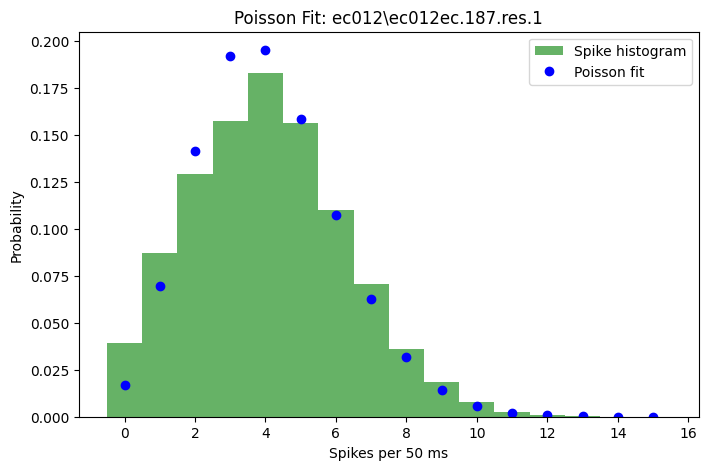

Mean ISI (s): 0.012299
Exponential λ: 81.310


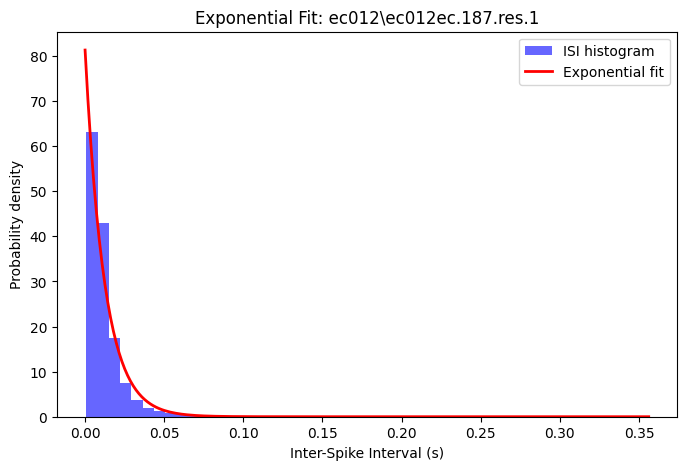

------------------------------------------------------------

------------------------------------------------------------
Analyzing file: ec012\ec012ec.187.res.2
Total spikes: 135288
Duration (s): 1096.40


In [ ]:
for selected_file in all_file_paths:
    print("------------------------------------------------------------")
    print(f"Analyzing file: {selected_file}")
    
    spike_indices = load_spike_data(selected_file)
    spike_times = convert_to_time(spike_indices)
    
    print(f"Total spikes: {len(spike_times)}")
    print(f"Duration (s): {spike_times[-1]:.2f}")
    
    # Poisson Fit
    window_size = 0.05
    counts = compute_spike_counts(spike_times, window_size)
    lambda_est = np.mean(counts)
    fano_factor = np.var(counts) / lambda_est if lambda_est > 0 else np.nan
    
    print(f"Poisson λ: {lambda_est:.3f}")
    print(f"Fano factor: {fano_factor:.3f}")
    
    plt.figure(figsize=(8, 5))
    bins = np.arange(np.min(counts), np.max(counts) + 2) - 0.5
    plt.hist(counts, bins=bins, density=True, alpha=0.6, color='g', label='Spike histogram')
    x_vals = np.arange(int(np.min(counts)), int(np.max(counts)) + 1)
    plt.plot(x_vals, poisson.pmf(x_vals, lambda_est), 'bo', label='Poisson fit')
    plt.xlabel('Spikes per 50 ms')
    plt.ylabel('Probability')
    plt.title(f'Poisson Fit: {selected_file}')
    plt.legend()
    plt.show()
    
    # Exponential Fit
    isi = compute_isi(spike_times)
    mean_isi = np.mean(isi)
    lambda_isi_est = 1.0 / mean_isi if mean_isi > 0 else np.nan
    
    print(f"Mean ISI (s): {mean_isi:.6f}")
    print(f"Exponential λ: {lambda_isi_est:.3f}")
    
    plt.figure(figsize=(8, 5))
    plt.hist(isi, bins=50, density=True, alpha=0.6, color='b', label='ISI histogram')
    if not np.isnan(lambda_isi_est):
        x_pdf = np.linspace(0, np.max(isi), 200)
        plt.plot(x_pdf, lambda_isi_est * np.exp(-lambda_isi_est * x_pdf), 'r-', lw=2, label='Exponential fit')
    plt.xlabel('Inter-Spike Interval (s)')
    plt.ylabel('Probability density')
    plt.title(f'Exponential Fit: {selected_file}')
    plt.legend()
    plt.show()

    print("------------------------------------------------------------\n")
